In [1]:
import numpy as np

from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

In [50]:
df_analyse=pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';')  
df_analyse.sort_values('date',ascending=True).head()
ydata = np.array(df_analyse.India[45:100])
t=np.arange(len(ydata))

In [51]:
I0=ydata[0]
N0=1000000 
S0=N0-I0
R0=0
beta=.4
gamma=.1

In [52]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [53]:
def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI

In [54]:
popt=[0.4,0.1]
fit_odeint(t, *popt)

array([3.40000000e+01, 4.58944371e+01, 6.19495227e+01, 8.36202663e+01,
       1.12870194e+02, 1.52348821e+02, 2.05630845e+02, 2.77538368e+02,
       3.74574647e+02, 5.05507398e+02, 6.82152206e+02, 9.20422755e+02,
       1.24173536e+03, 1.67488105e+03, 2.25850940e+03, 3.04440355e+03,
       4.10176057e+03, 5.52271815e+03, 7.42936683e+03, 9.98242412e+03,
       1.33915596e+04, 1.79269493e+04, 2.39308525e+04, 3.18266497e+04,
       4.21206706e+04, 5.53892789e+04, 7.22405938e+04, 9.32385990e+04,
       1.18780533e+05, 1.48930950e+05, 1.83240508e+05, 2.20609145e+05,
       2.59273024e+05, 2.96975475e+05, 3.31313034e+05, 3.60158747e+05,
       3.82017170e+05, 3.96197976e+05, 4.02784088e+05, 4.02452905e+05,
       3.96241425e+05, 3.85329861e+05, 3.70881872e+05, 3.53947778e+05,
       3.35419476e+05, 3.16020590e+05, 2.96317026e+05, 2.76737184e+05,
       2.57595065e+05, 2.39112560e+05, 2.21439166e+05, 2.04668575e+05,
       1.88852185e+05, 1.74009852e+05, 1.60138318e+05])

In [55]:

popt, pcov = optimize.curve_fit(fit_odeint, t, ydata,maxfev=10000)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

standard deviation errors :  [0.0080375  0.00745612]  start infect: 34
Optimal parameters: beta = 0.6338166341335683  and gamma =  0.48008193245064895


In [56]:

# get the final fitted curve
fitted=fit_odeint(t, *popt)

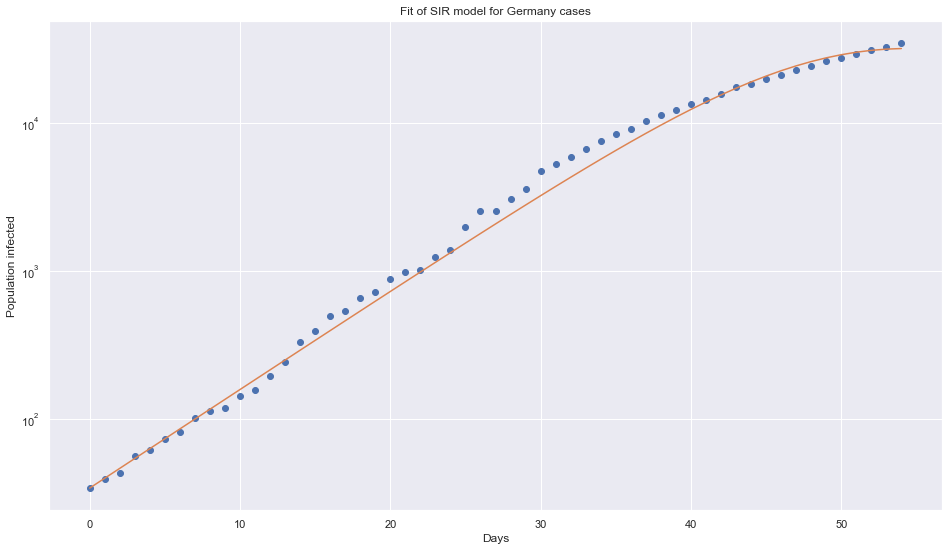

Optimal parameters: beta = 0.6338166341335683  and gamma =  0.48008193245064895
Basic Reproduction Number R0  1.3202259683011979
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


In [57]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
plt.title("Fit of SIR model for Germany cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki")

In [58]:
print (fitted)

[   34.            39.64903003    46.23589689    53.91603222
    62.87053238    73.31036199    85.48123267    99.66926337
   116.20753898   135.48370135   157.94872661   184.1270561
   214.62826999   250.1605086    291.5458665    339.73799394
   395.84215046   461.13795392   537.10505154   625.45190373
   728.14780393   847.45815353   985.98283881  1146.6973166
  1332.99568059  1548.73449236  1798.27554966  2086.52474718
  2418.96358284  2801.66770379  3241.30599628  3745.1112678
  4320.81152259  4976.5086002   5720.48873584  6560.94819416
  7505.6168829   8561.26479594  9733.08135185 11023.92737487
 12433.47473608 13957.26992355 15585.78586905 17303.55421672
 19088.50312319 20911.64264351 22737.24644366 24523.65376494
 26224.76235439 27792.19676851 29178.02906487 30337.8197085
 31233.66102097 31836.86578363 32129.96976508]


In [59]:
print(fitted.shape[0])

55
